**Package importation**

In [42]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from pylab import rcParams

In [43]:
warnings.filterwarnings("ignore")
rcParams["figure.figsize"] = 30, 10

**Data Loading and Preview**

In [26]:
data = pd.read_csv("../data/raw_data.csv")
data.drop(columns=["index", "Patient Id"], inplace=True)

In [27]:
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


**Basic Data Analysis and Sanity Check**

In [9]:
print(
    f"The dataset has {data.shape[0]} records and {data.shape[1]} features \nThe feature set is composed by: {data.columns}"
)

The dataset has 1000 records and 24 features 
The feature set is composed by: Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [30]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [12]:
print(f"The dataset has a total of {data.isna().sum().sum()} values which are NaN")

print(f"The dataset has a total of {data.duplicated().sum()} records, which corresponds to {100 * data.duplicated().sum() / data.shape[0]}% of all data")

The dataset has a total of 0 values which are NaN
The dataset has a total of 848 records, which corresponds to 84.8% of all data


This is an interesting finding! 

Given the dimension of the dataset, I will consider that the duplicates are not due to mistakes in the data gathering process.


We will now analyze, their relationship with the target variable "Level", through visualizations and hyphotesis testing.

/home/mariogomes/.cache/pypoetry/virtualenvs/mlops-project-LQNwQQj3-py3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


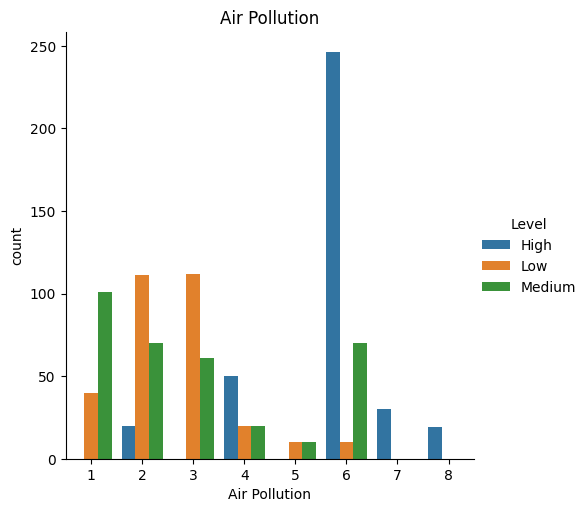

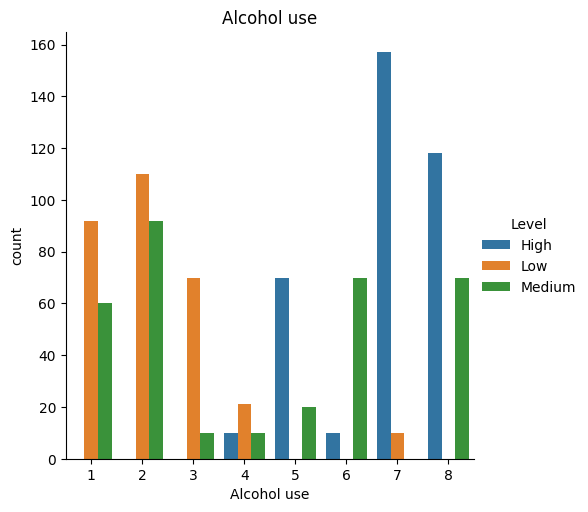

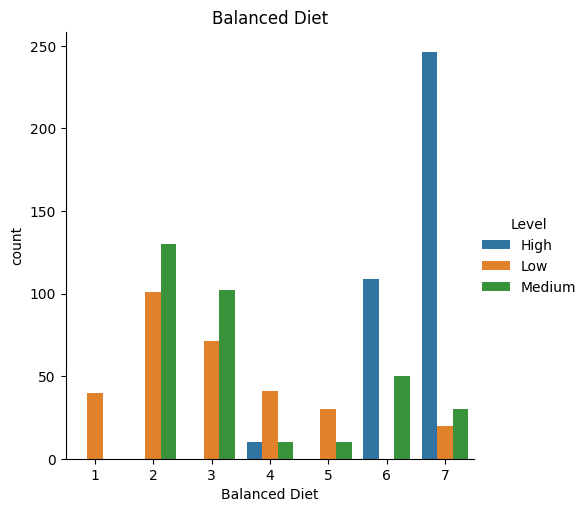

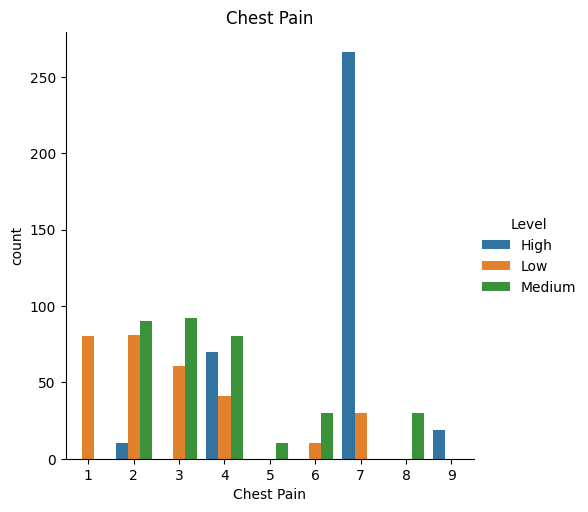

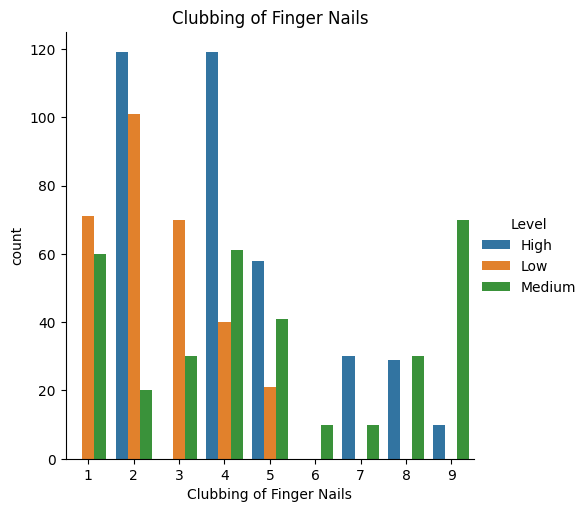

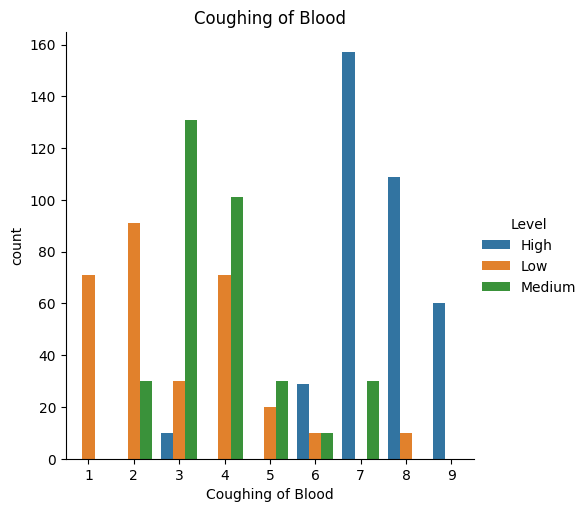

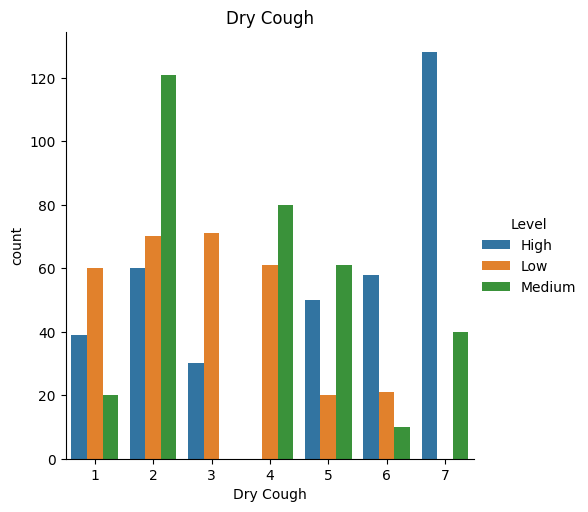

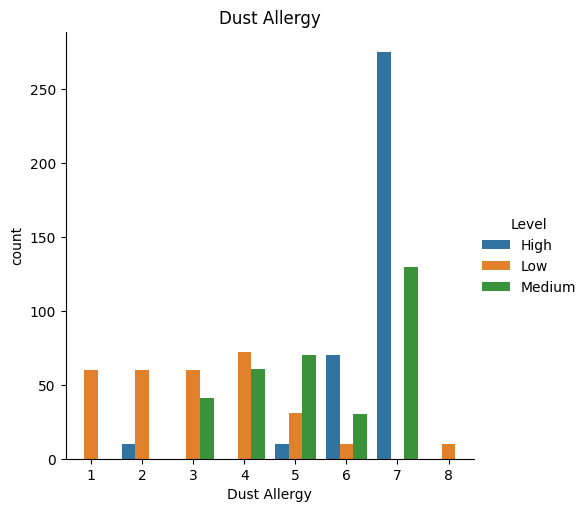

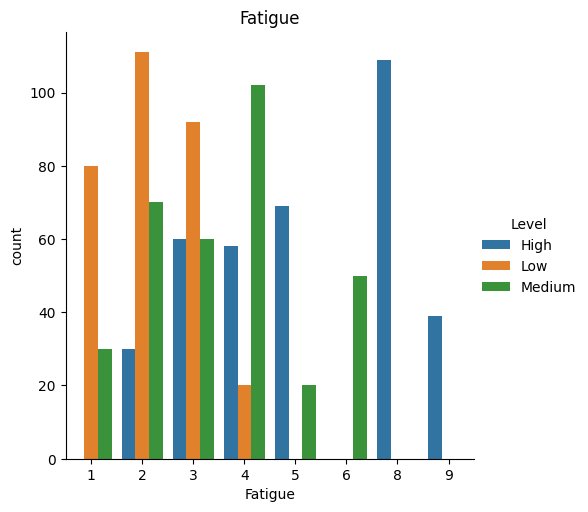

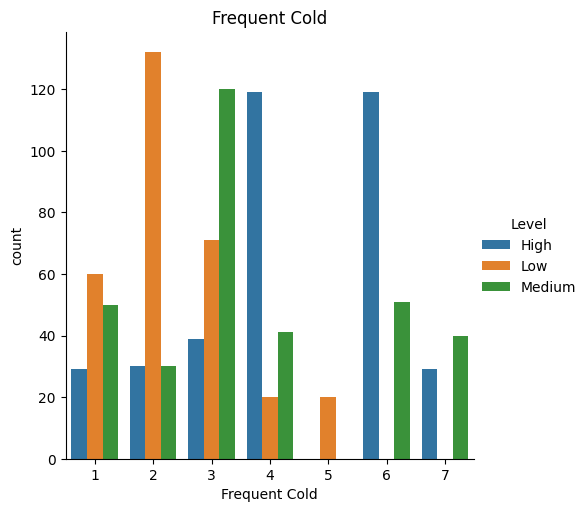

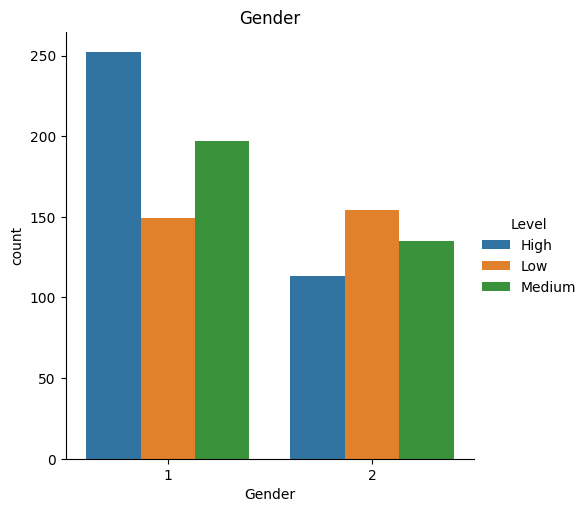

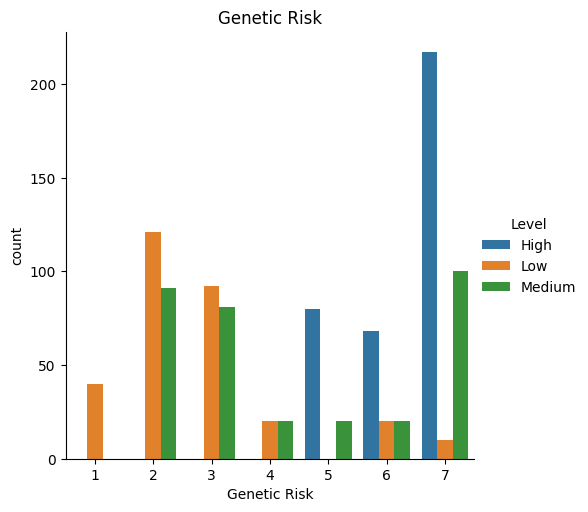

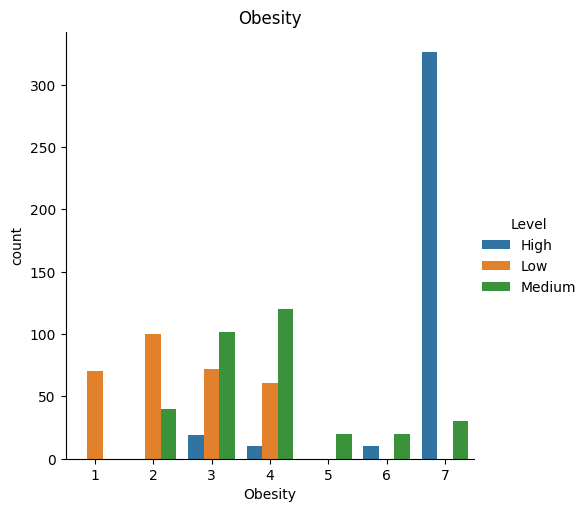

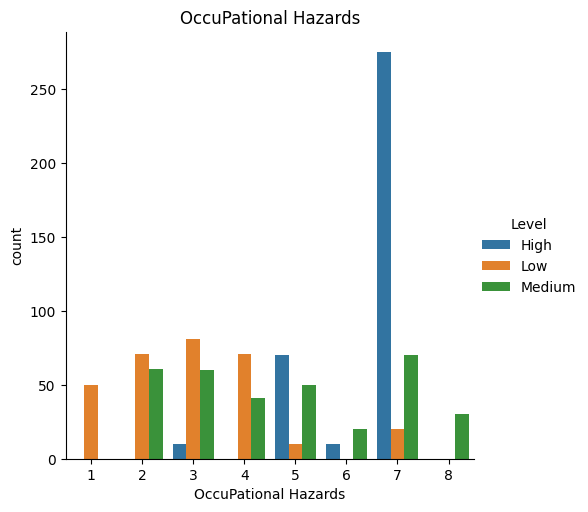

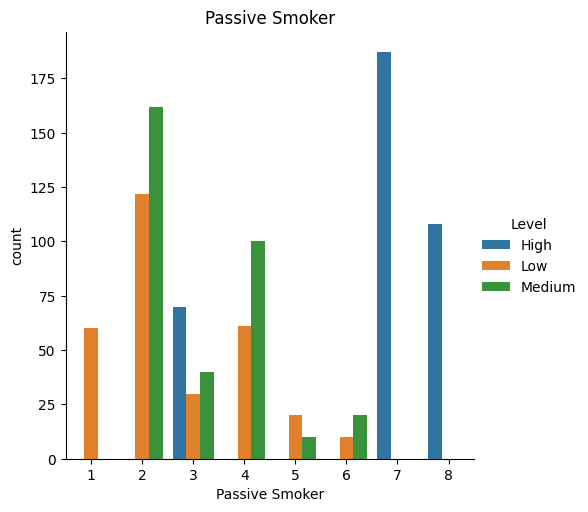

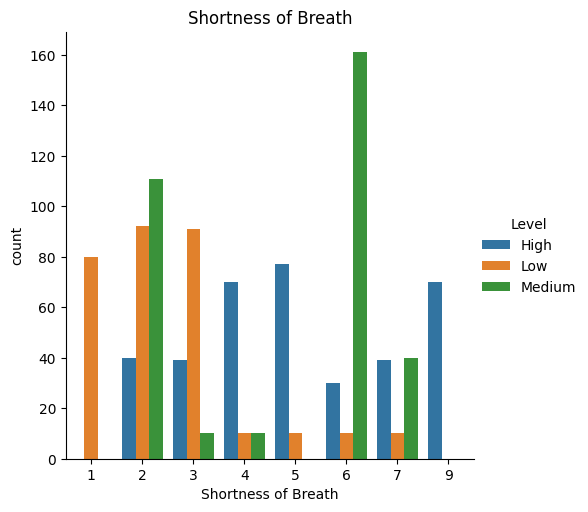

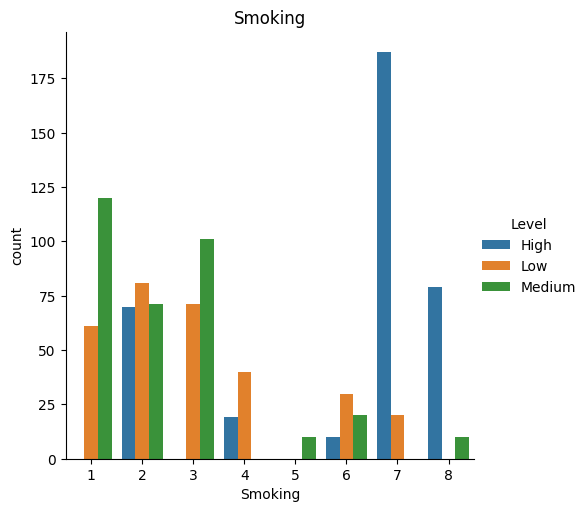

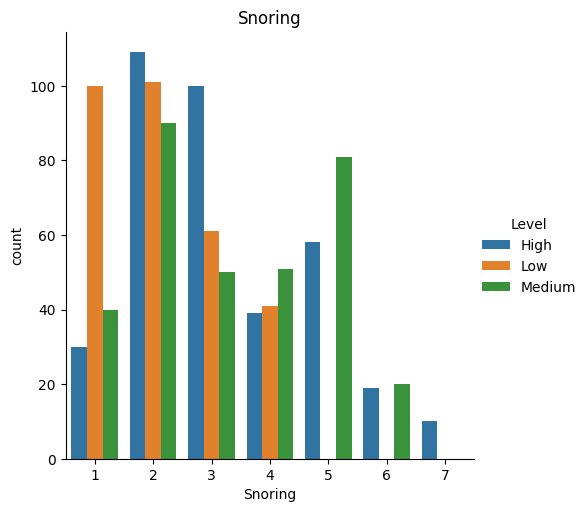

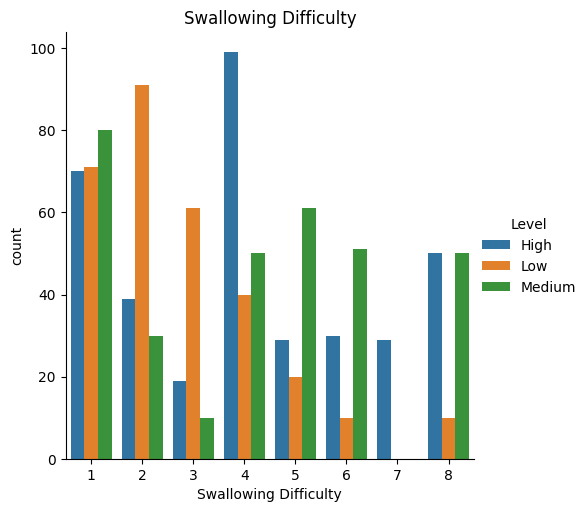

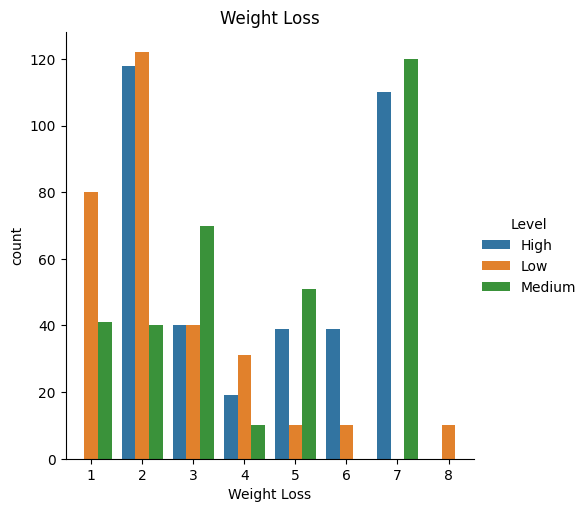

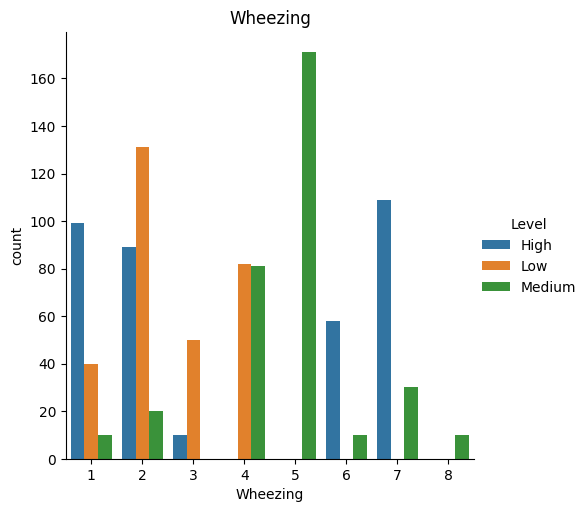

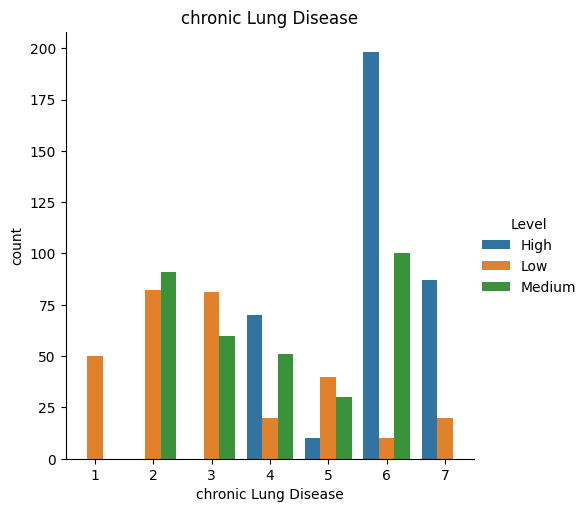

In [13]:
for thisFeature in np.setdiff1d(data.columns, ["Age", "Level"]):
    sns.catplot(
        data=data, 
        x=thisFeature, 
        hue="Level", 
        kind="count"
    ).set(title=f"{thisFeature}")
    

<Axes: xlabel='Age', ylabel='Density'>

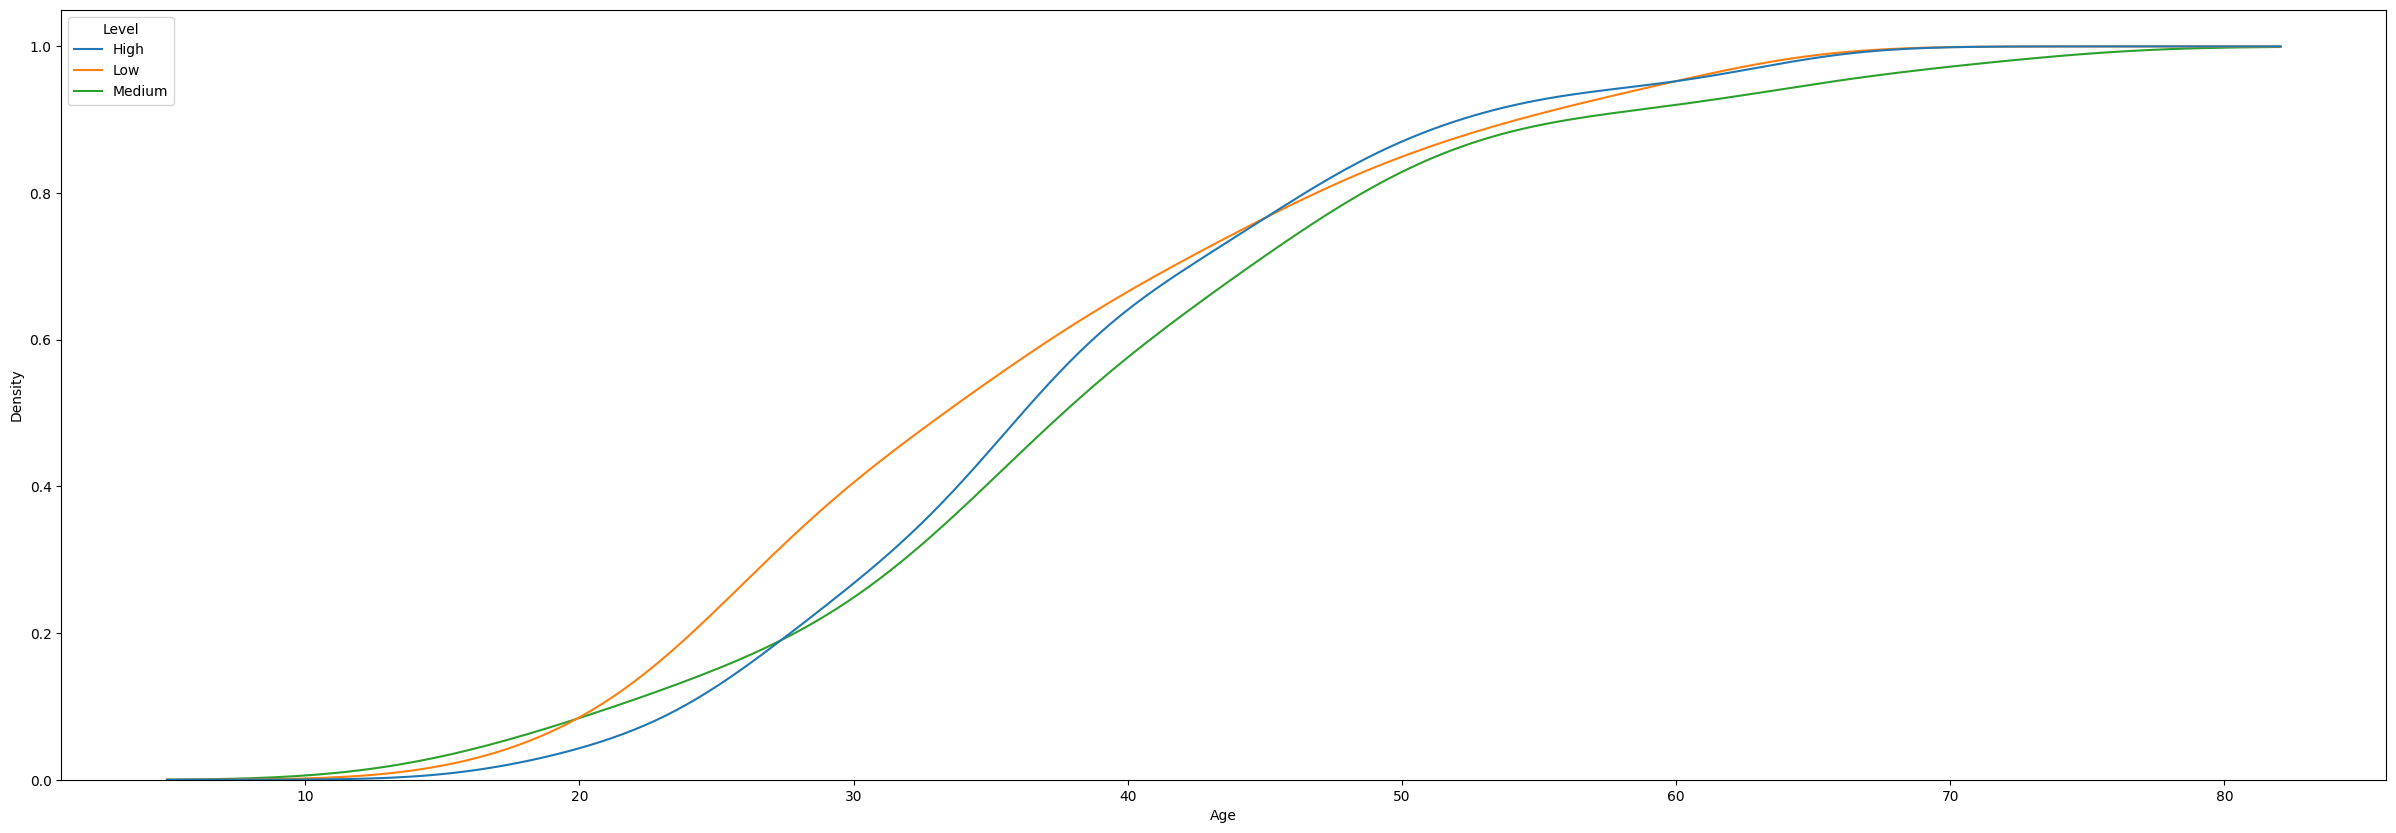

In [14]:
sns.kdeplot(
    data=data,
    x="Age",
    hue="Level",
    cumulative=True,
    common_norm=False,
    common_grid=True
)

Is interesting to see that in the ages between 20 and 40 years old, is where the majority of low risk lung cancer population lie!

On the other hand, between the ages of 45 and 60 the majority of records are associated with the high risk of developing lung cancer!

Lastly, is important to observe that the feature Age value domain is very different from the other features! This is something we will have to manage during feature engineering!

**Feature Engineering**

Since the majority of the features are discrete, I will consider to expand our dataset with *Feature Crosses*!

I will compute a set of these types of features and then study the distribution of the target for each value of these features.

In [44]:
data["Alcohol_x_Pain"] = data["Alcohol use"] * data["Chest Pain"]
data["Diet_x_Cold"] = data["Balanced Diet"] * data["Frequent Cold"]
data["Allergy_x_Weight"] = data["Dust Allergy"] * data["Weight Loss"]
data["Smoking_x_Hazards"] = data["Smoking"] * data["OccuPational Hazards"]
data["Air_x_Nails"] = data["Air Pollution"] * data["Clubbing of Finger Nails"]
data["Cough_x_Genetic"] = data["Dry Cough"] * data["Genetic Risk"]
data["Chronic_x_Snoring"] = data["chronic Lung Disease"] * data["Snoring"]

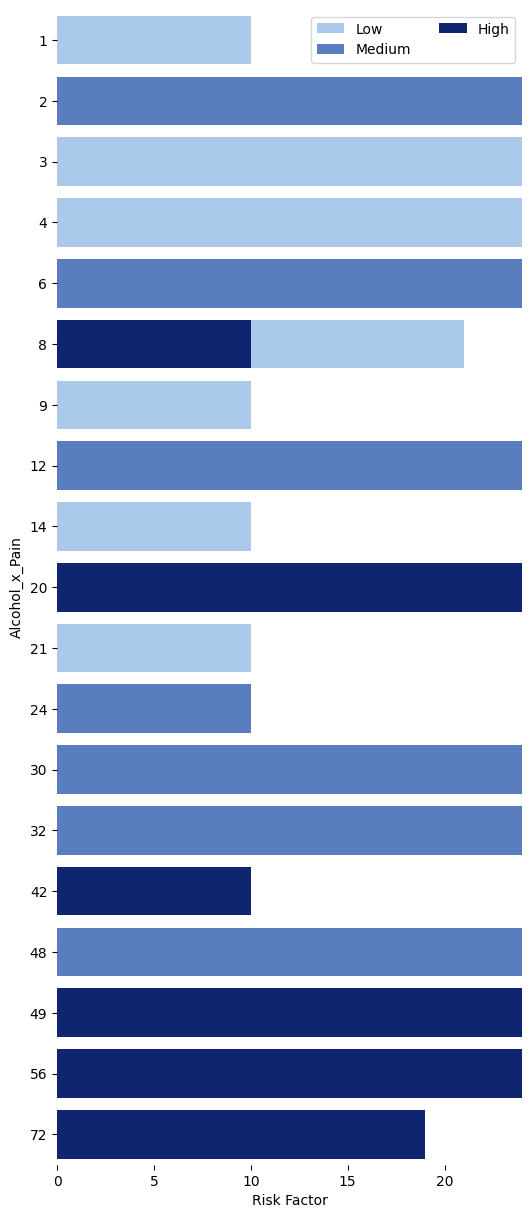

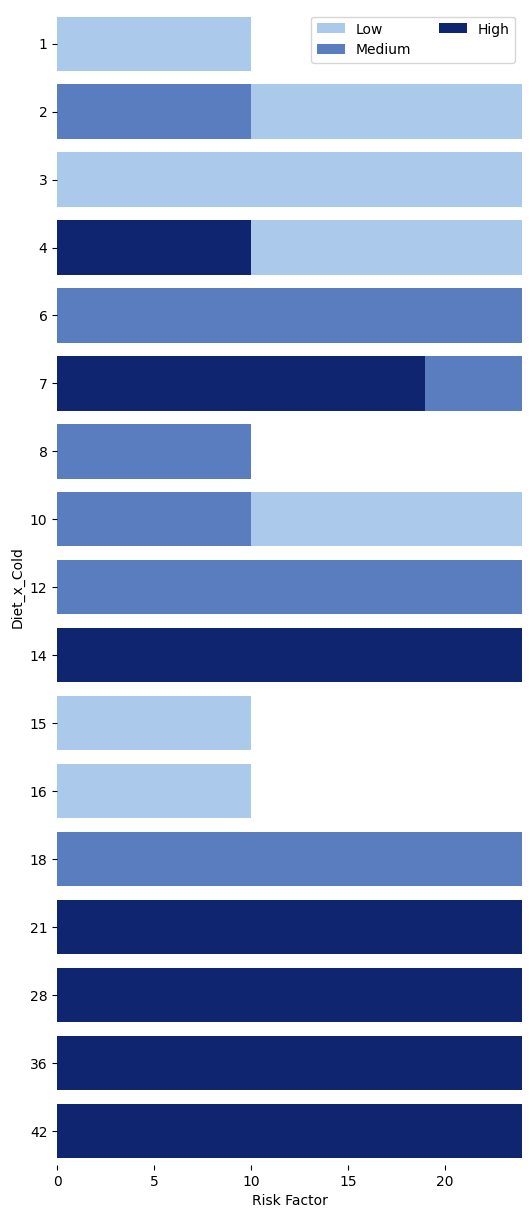

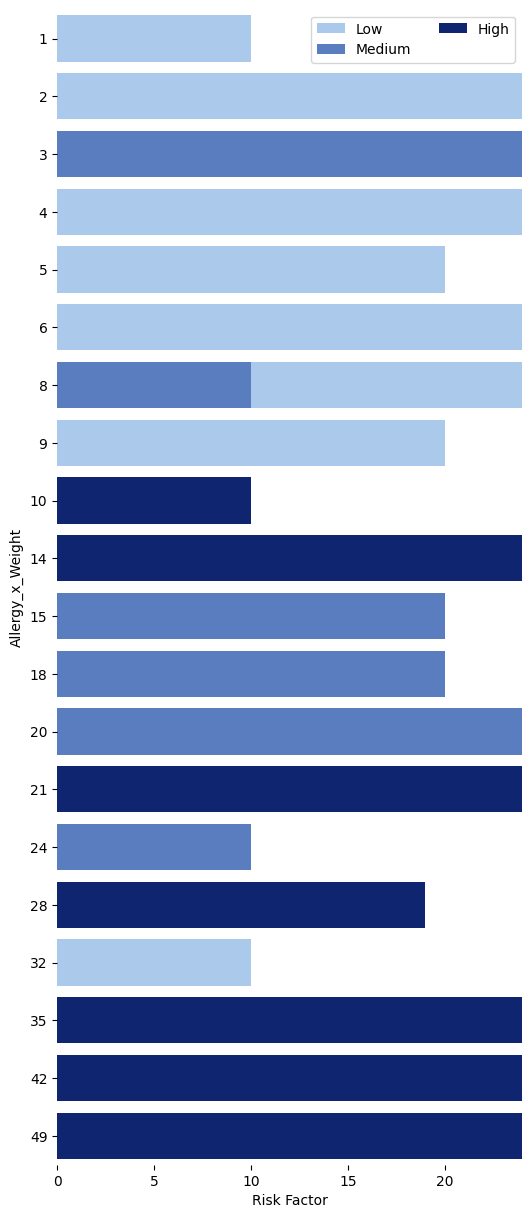

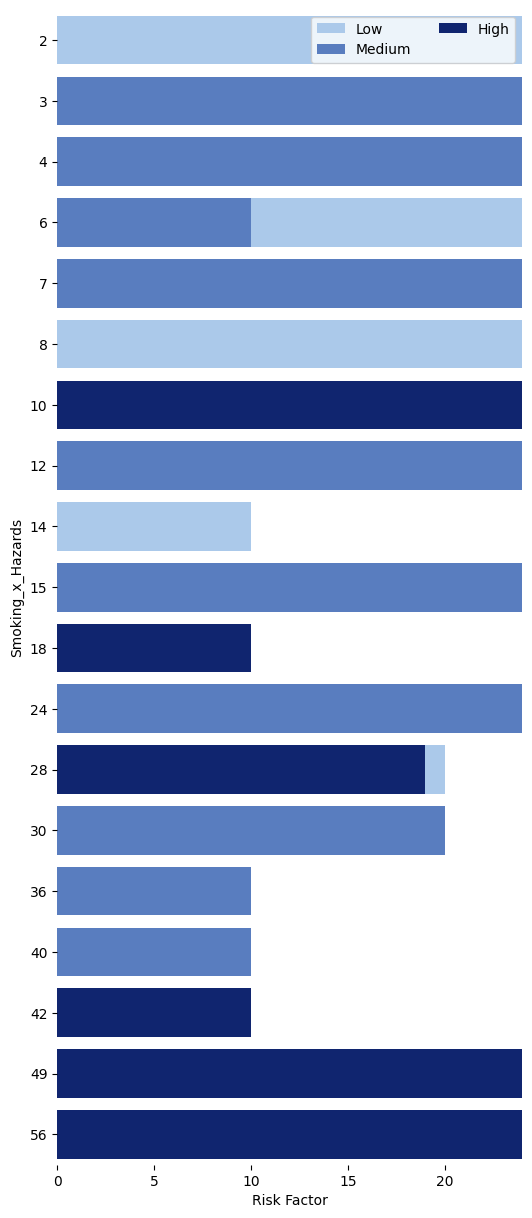

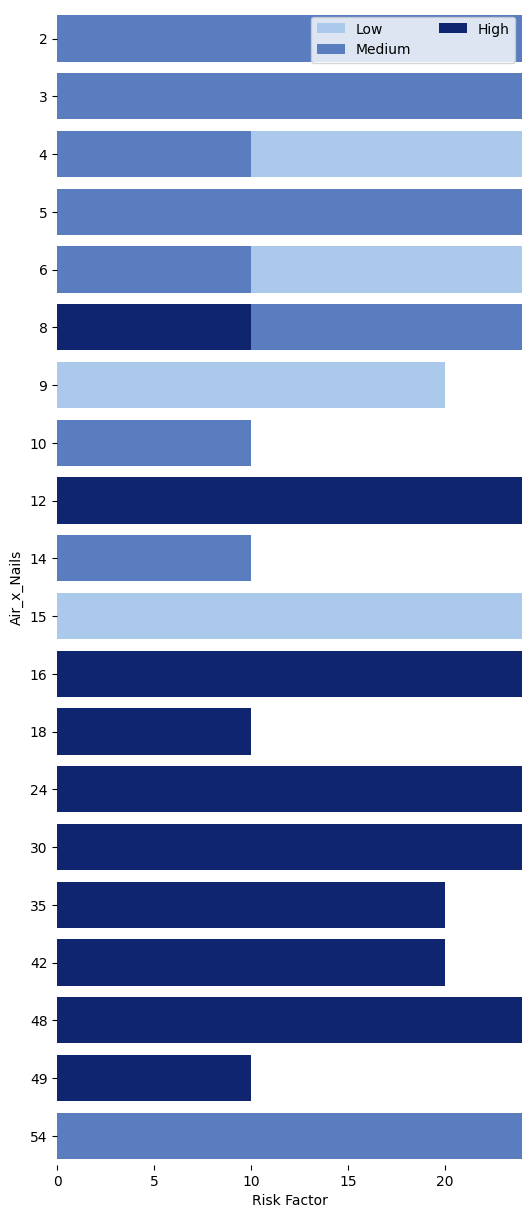

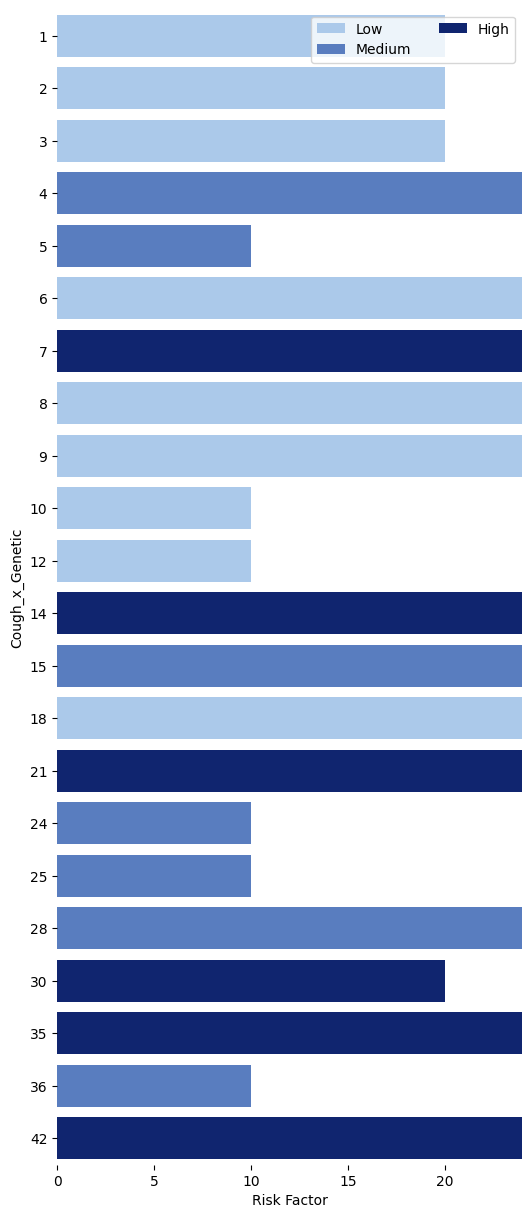

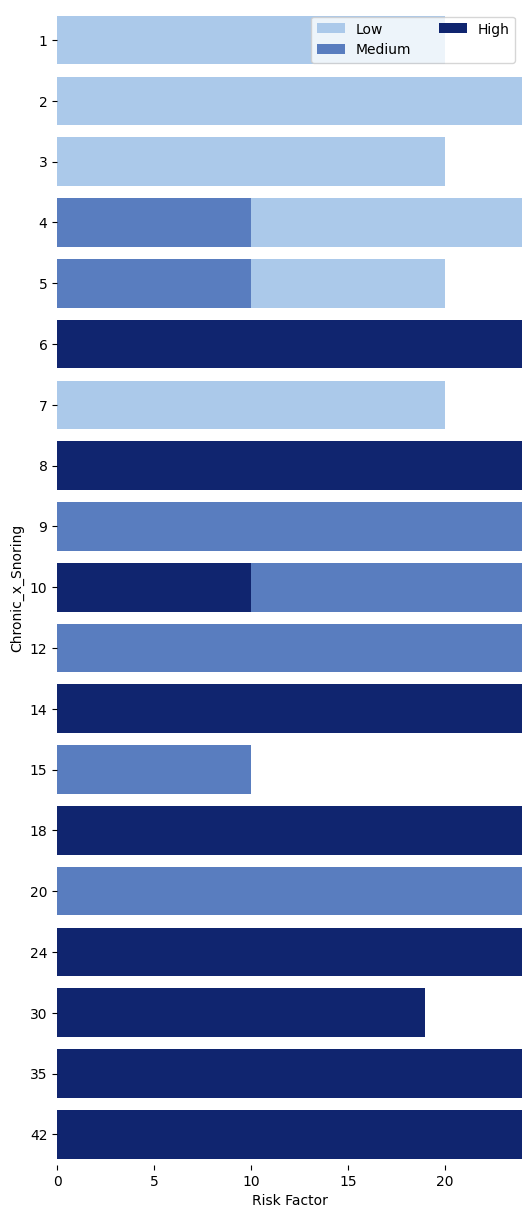

In [61]:
feature_crosses = [feature for feature in data.columns if "_x_" in feature]
colors_mapping = {"Low": "pastel", "Medium": "muted", "High": "dark"}

for this_feature in feature_crosses:
    subsample = data[[this_feature, "Level"]]
    subsample["counter"] = 1
    subsample = subsample.groupby(by=[this_feature, "Level"], as_index=False).agg({"counter": "sum"})
    subsample = pd.pivot_table(subsample, values="counter", index=[this_feature], columns=["Level"], fill_value=0).reset_index()

    _, ax = plt.subplots(figsize=(6, 15))

    for this_level in ["Low", "Medium", "High"]:
        sns.set_color_codes(colors_mapping[this_level])
        sns.barplot(x=this_level, y=this_feature, data=subsample, label=this_level, color="b", orient="y")

    ax.legend(ncol=2, loc="upper right", frameon=True)
    ax.set(xlim=(0, 24), ylabel=this_feature, xlabel="Risk Factor")
    sns.despine(left=True, bottom=True)

Is interesting to see that some feature crosses can effectively separate the records with respect to their risk level, this is the example of Cough_x_Genetic.

Based on this analysis, I will extend the original dataset with the following feature crosses: Cough_x_Genetic, Alergy_x_Weight and Alcohol_x_Pain.

This finishes my minimal EDA analysis.